# Preprocessing and analyzing the audio data

In [1]:
# importing the libraries

import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Loading the files 
file = 'audio/blues.00000.wav'
scale_file = "audio/scale.wav"
debussy_file = "audio/debussy.wav"
redhot_file = 'audio/redhot.wav'
duke_file = 'audio/duke.wav'

In [3]:
ipd.Audio(file) # 30 seconds Audio File

###  librosa.load() :  loads an audio file as a floating point time series

In [4]:
signal , sr = librosa.load(file)
scale, sr = librosa.load(scale_file)
debussy , sr = librosa.load(debussy_file)
redhot , sr = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

In [5]:
signal # its just an floating point array!

array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32)

In [6]:
signal.shape , signal.size # so we are having 661794 no. of sample data points in 30 seconds audio

((661794,), 661794)

In [7]:
661794/30 # this is the sr ie... no. of samples in 1 sec

22059.8

# Time domain Analysis

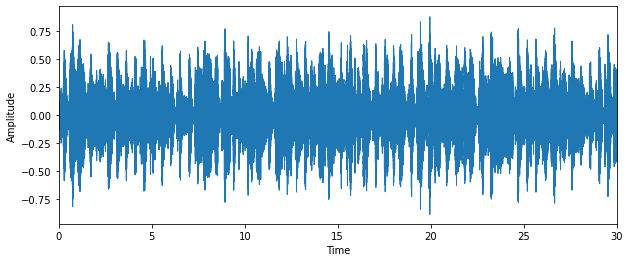

In [9]:
plt.figure(figsize=(10,4))
librosa.display.waveplot(signal, sr=22050) # sr * T ... 22050 * 30 sec = signal value we will get
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Frequency Domain using FFT

In [72]:
len(magnitude)

661794

In [21]:
30*22050

661500

### Plotting the Power Spectrum using the magnitude and the frequency
We got the symmetrical plot thats the theory of Nyquist theorem

Text(0, 0.5, 'Magnitude')

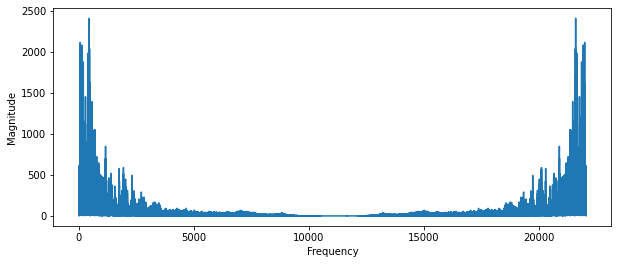

In [10]:
import numpy as np
plt.figure(figsize=(10,4))

fft = np.fft.fft(signal) # we will get (30*22050) values and each value of this has complex value and then we will extract the magnitude

magnitude = np.abs(fft) # these magnitudes explain that each frequencies contribution towards our overall sound
frequency = np.linspace(0, sr, len(magnitude)) # now we will map relative frequency bins
plt.plot(frequency,magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')




### Plotting only one side of the Power Spectrum ....half Samplt Rate ie..11k since it is symmetrical

The Power Spectrum problem is that it is only the static snapshot of the whole sound!! and considering the average frequency of the bins of the whole sound so we will use SFFT

Text(0, 0.5, 'Magnitude')

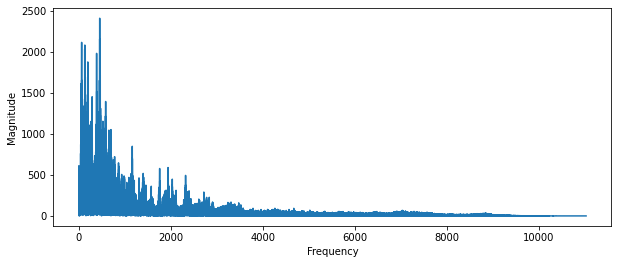

In [11]:
plt.figure(figsize=(10,4))


fft = np.fft.fft(signal) # we will get (30*22050) values and each value of this has complex value and then we will extract the magnitude

magnitude = np.abs(fft) # these magnitudes explain that each frequencies contribution towards our overall sound
frequency = np.linspace(0, sr, len(magnitude)) # now we will map relative frequency bins

left_frequency = frequency[:int(len(frequency)/2)] #focusing only half of the sample rate sr.....
left_magnitude = magnitude[:int(len(magnitude)/2)] # now these 2 arrays are telling us the contribution in overall sound

plt.plot(left_frequency,left_magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')


# STFT (Short Time Fourier Transform)-- 
# Spectrogram (time + frequency + amplitude)

In [75]:
spectrogram.shape

(1025, 1293)

In [80]:
661500/512

1291.9921875

In [79]:
661794/512

1292.56640625

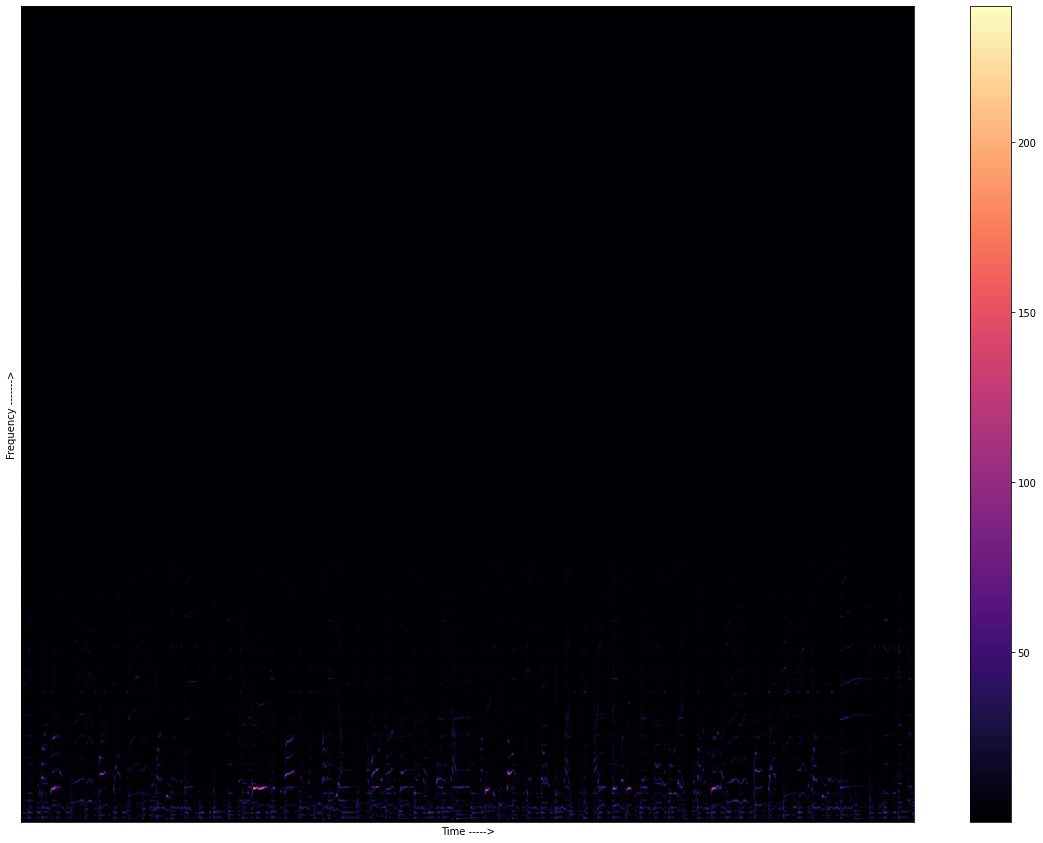

In [12]:
n_fft = 2048 # window size considering when a single FFT
hop_length = 512 # stride...ie...how much i will jump the window size to the right side

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft) # fetching the magnitude



plt.figure(figsize=(20,15))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length) # specshow is function that unables to visualize spectrogram data
plt.xlabel("Time ----->")
plt.ylabel("Frequency ------->")
plt.colorbar()
plt.show()

In [15]:
log_spectrogram.shape # same shape as above!!

(1025, 1293)

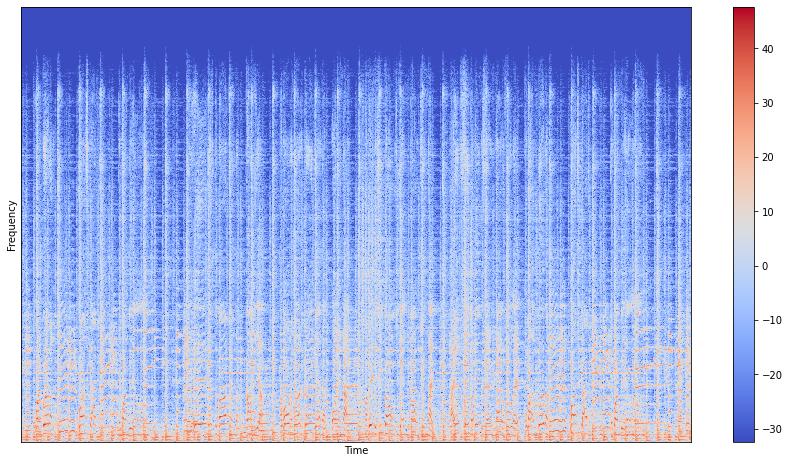

In [14]:
n_fft = 2048 # window size
hop_length = 512 # stride...ie...how much i will jump the window size
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram) # taking the amplitudes and converting to DB units

plt.figure(figsize=(15,8))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

# MFCCs 

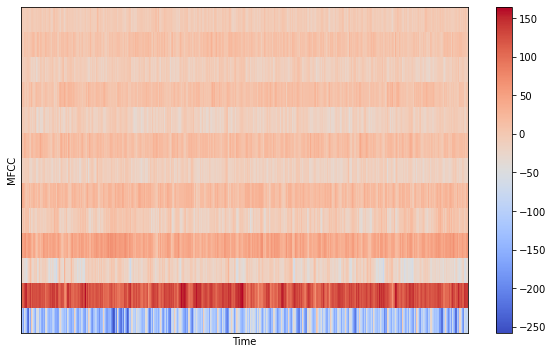

In [85]:
MFCCs = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length = hop_length, n_mfcc=13)# n_mfcc is no. of coeff we want to extract per window!!
plt.figure(figsize=(10,6))
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

In [47]:
MFCCs.shape

(13, 1293)

In [43]:
MFCCs.size

16809